In [1]:
from sympy import *
from sympy.solvers.inequalities import reduce_inequalities
init_printing()

In [2]:
c, v, b, α1, α2, TA, TB, W, p, λ = symbols(r'c v b \alpha_1 \alpha_2 T_A T_B W p \lambda')
v = 1

In [3]:
pstar = α1*b*v*TA - c*v*(1-TB) + (TA - TB)
pstar /= (c*(1-v) - b*(1-α1*v)) * (TA - TB)
wstar = 1 + (b-c)*pstar

In [4]:
γ1 = b*v*α1*TA + (TA - TB)
γ1 /= v*(1-TB)

γ2 = b*v*α1*TB + (1+b)*(TA - TB)
γ2 /= v*(1-TB) + (1-v)*(TA - TB)

a1 = c*v*(1-TA) - (1+b+c)*(TA - TB)
a1 /= b*v*TB

a2 = c*v*(1-TB) - (TA - TB)
a2 /= b*v*TA

In [5]:
X = b*(1-(1-α2)*TB*(1-p))*p + (1-c)*(1-TB*(1-p))
Y = b*TA*(p+α2*(1-p))*p + TA*p
Z = (1-c)*TB*(1-p) + b*TB*(1-α2)*p*(1-p)
Q = 1-TA*p + b*(1-TA*p -α2*TA*(1-p))*p

In [6]:
f = Poly(λ**2 - (X+Q)*λ/W + X*Q/(W*W) - Y*Z/(W*W), λ)

# determine when $f(1) > 0$

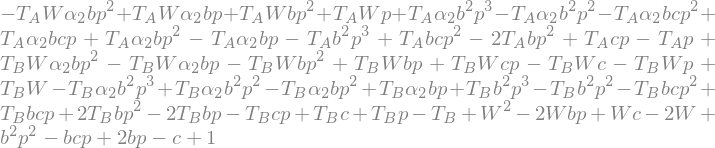

In [7]:
f1 = simplify(f(1)*W**2) # multiply by positive
f1

In [8]:
ineq = simplify(reduce_inequalities(0 < f1.subs(W, 1+(b-c)*p), [α2]))
ineq

In [10]:
lhs, rhs = ineq.args
lhs /= (c*p) # multiply by positive
rhs /= (c*p)

In [11]:
lhs = simplify(lhs / (1-p)) # multiply by positive
rhs = simplify(rhs / (1-p))

In [12]:
rhs = simplify(rhs.subs(p, pstar)*(1-α1)) # multiply by positive
lhs = simplify(lhs.subs(p, pstar)*(1-α1))

In [13]:
lhs, rhs

In [14]:
latex(lhs)

'\\alpha_2 \\left(T_{A} b + T_{A} + T_{B} c - T_{B} - c\\right)'

In [15]:
latex(rhs)

'\\alpha_1 \\left(T_{A} b + T_{A} + T_{B} c - T_{B} - c\\right)'

p* < 0 <=> TA α1 b + TA - TB > c(1-TB) => (α1<1) => TA b + TA - TB - c(1-TB) > 0

In [116]:
rhs = simplify(rhs / (TA*b + TA - TB - c*(1-TB))) # multiply by positive
lhs = simplify(lhs / (TA*b + TA - TB - c*(1-TB)))

In [117]:
lhs, rhs

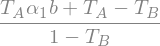

In [16]:

γ1

# determine when $f'(1) > 0$

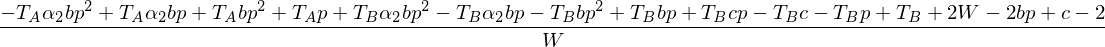

In [380]:
# df = diff(f, λ)
df = Poly(2*λ - (X+Q)/W, λ)
df1 = df(1)
df1

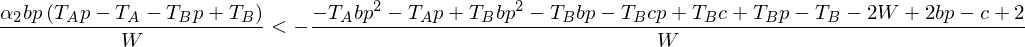

In [386]:
ineq = simplify(reduce_inequalities(0 < df1, [α2]))
ineq

In [455]:
lhs, rhs = ineq.args
rhs = simplify(rhs * W) # multiply by mean fitness > 0
lhs = simplify(lhs * W)
lhs, rhs

In [456]:
simplify(lhs - (
    -α2*b*p*(1-p)*(TA-TB)
))

In [457]:
lhs = -α2*b*p*(1-p)*(TA-TB)
lhs

In [460]:
simplify(rhs.subs(W, 1+(b-c)*p) - ( 
    (TA-TB)*p + (TA-TB)*b*p*p -c*(1-TB) + 2*c*(1-TB)*(1-p) + TB*W
).subs(W, 1+(b-c)*p))

In [463]:
G = - α1*b*TA - (TA - TB) + c*(1-TB)
H = b * (1-α1) * (TA - TB)

multiply boths sides by $1-\alpha_1$

In [461]:
lhs = α2*(1-p)*(TA*α1*b + (TA-TB) - c*(1-TB))
lhs

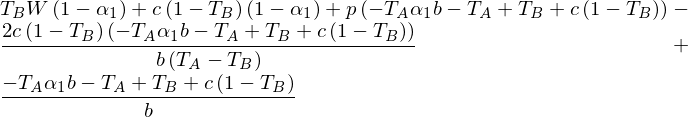

In [464]:
rhs = G/b  + G*p -c*(1-TB)*(1-α1) + 2*c*(1-TB)*(1-α1) - G/(b*(TA - TB))*2*c*(1-TB) + TB*W*(1-α1)
rhs